In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')

# DATA PREPARATION

In [3]:
x_train = np.load('dataset/x_train.npy').astype(np.float32)
y_train = np.load('dataset/y_train.npy').astype(np.float32)
x_val = np.load('dataset/x_val.npy').astype(np.float32)
y_val = np.load('dataset/y_val.npy').astype(np.float32)


In [4]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


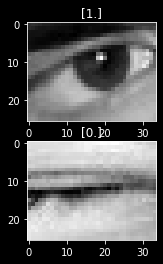

In [5]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[4]))
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)

In [8]:
image_shape=(26, 34, 1)

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same',input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])



In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)             

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [20]:
model.fit_generator(train_generator,epochs=30,
                              validation_data=val_generator,
                             callbacks=[early_stop])

Epoch 1/30
81/81 [==============================] - 6s 73ms/step - loss: 0.4846 - acc: 0.7467 - val_loss: 0.2716 - val_acc: 0.8924
Epoch 2/30
81/81 [==============================] - 6s 72ms/step - loss: 0.2828 - acc: 0.8871 - val_loss: 0.1393 - val_acc: 0.9444
Epoch 3/30
81/81 [==============================] - 6s 73ms/step - loss: 0.2164 - acc: 0.9192 - val_loss: 0.1023 - val_acc: 0.9549
Epoch 4/30
81/81 [==============================] - 6s 72ms/step - loss: 0.1541 - acc: 0.9466 - val_loss: 0.0681 - val_acc: 0.9722
Epoch 5/30
81/81 [==============================] - 6s 73ms/step - loss: 0.1484 - acc: 0.9490 - val_loss: 0.0831 - val_acc: 0.9722
Epoch 6/30
81/81 [==============================] - 6s 73ms/step - loss: 0.1204 - acc: 0.9582 - val_loss: 0.0678 - val_acc: 0.9757
Epoch 7/30
81/81 [==============================] - 6s 77ms/step - loss: 0.1116 - acc: 0.9590 - val_loss: 0.0663 - val_acc: 0.9826
Epoch 8/30
81/81 [==============================] - 6s 79ms/step - loss: 0.0899 - a

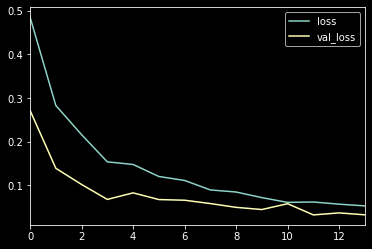

In [21]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [22]:
from tensorflow.keras.models import load_model 


In [23]:
model.save('blinkdetection_check.h5')

In [24]:
model.history.history


{'loss': [0.48484768082905627,
  0.2829408624885807,
  0.21624644560493061,
  0.15404141003414354,
  0.14806837581057744,
  0.12059064681677051,
  0.11150422598950548,
  0.08982092255045071,
  0.08504617565411611,
  0.07224183233436096,
  0.061341995596655194,
  0.062246744079430344,
  0.057250559053398896,
  0.053354927029659466],
 'acc': [0.74671304,
  0.8870843,
  0.9191802,
  0.9466357,
  0.9489559,
  0.95823663,
  0.95901006,
  0.9655839,
  0.97177106,
  0.97331786,
  0.97795826,
  0.9822119,
  0.9798917,
  0.979505],
 'val_loss': [0.27163683871428174,
  0.13934932235214445,
  0.10228785789675182,
  0.06811818025178379,
  0.08312657392687267,
  0.06783679996927579,
  0.06627840962674883,
  0.058672114482356444,
  0.0499751903116703,
  0.044995800178084105,
  0.0583372815615601,
  0.032682442002826266,
  0.03732249068303241,
  0.03288446465093228],
 'val_acc': [0.8923611,
  0.9444444,
  0.9548611,
  0.9722222,
  0.9722222,
  0.9756944,
  0.9826389,
  0.9826389,
  0.9861111,
  0.986

In [29]:
import cv2


In [30]:
close=cv2.imread("close.JPG",-1)

In [31]:
print(close)

[[ 68  70  71  73  73  76  81  85  96 101 108 116 125 131 134 137 143 143
  146 148 144 139 134 129 128 124 120 115 110 107 100  91  82  78]
 [ 71  72  73  76  78  82  87  91  98 103 109 117 125 131 135 138 144 145
  150 152 149 143 137 130 127 123 119 115 110 106 100  92  85  81]
 [ 72  73  76  80  84  88  92  95  99 104 110 117 125 131 135 139 145 149
  155 156 153 148 140 131 124 120 117 114 109 104  97  91  84  80]
 [ 73  74  77  82  86  90  93  96  99 104 109 115 123 130 135 139 144 149
  154 154 151 147 140 130 124 120 118 115 109 102  96  91  84  79]
 [ 75  75  77  81  84  88  93  97 101 105 109 115 122 128 133 137 139 143
  147 146 143 142 137 129 126 121 117 114 107 100  95  91  85  81]
 [ 78  77  77  79  82  87  93  97 101 105 109 113 118 123 127 132 135 138
  140 139 137 137 134 128 124 120 116 111 106 102 100  96  99  96]
 [ 79  78  77  78  81  85  89  92  96 100 103 106 112 116 120 124 129 131
  133 133 131 131 129 123 120 117 115 110 105 102  99  93  90  88]
 [ 78  77  77

In [32]:
print(close.shape)

(26, 34)
